# Importing Dependencies

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import time
from keras.preprocessing.text import Tokenizer
from collections import Counter
import re
from keras import layers
import string

# Load Data

In [17]:
df = pd.read_csv("/content/drive/MyDrive/Final DataFrame.csv") # loaded csv(comman seperated values) files using pandas library
df.head()

,Unnamed: 0,title,text,Target
0,3461,Trump Will ANNHILILATE The Working Class He’s...,"Throughout his campaign, Trump repeatedly told...",0
1,18596,Yemen Houthis say have shot down U.S. surveill...,DUBAI (Reuters) - Yemen s Houthi forces shot d...,1
2,16124,BREAKING NEWS: TRUMP ADMIN ANNOUNCES “MASSIVE ...,President Trump s 2017 Tax Reform for Economi...,0
3,21151,U.S. Commerce Secretary wants NAFTA autos cont...,MEXICO CITY (Reuters) - U.S. Commerce Secretar...,1
4,13857,U.S. warns of repercussions for Pakistan over ...,WASHINGTON (Reuters) - The White House said on...,1


# EDA

In [18]:
df.drop(['Unnamed: 0'],axis=1,inplace=True) # dropping unnamed column
df['Target'].value_counts() # 0-Fake , 1-True

0    23481
1    21417
Name: Target, dtype: int64

In [19]:
df.head() # Analysing our data by viewing the top 5 columns to get a rough idea on our columns and their datatypes

,title,text,Target
0,Trump Will ANNHILILATE The Working Class He’s...,"Throughout his campaign, Trump repeatedly told...",0
1,Yemen Houthis say have shot down U.S. surveill...,DUBAI (Reuters) - Yemen s Houthi forces shot d...,1
2,BREAKING NEWS: TRUMP ADMIN ANNOUNCES “MASSIVE ...,President Trump s 2017 Tax Reform for Economi...,0
3,U.S. Commerce Secretary wants NAFTA autos cont...,MEXICO CITY (Reuters) - U.S. Commerce Secretar...,1
4,U.S. warns of repercussions for Pakistan over ...,WASHINGTON (Reuters) - The White House said on...,1


In [20]:
df['text'].iloc[0] # exmaple of news

'Throughout his campaign, Trump repeatedly told anyone he could brainwash that the U.S. doesn t win at anything anymore. Supposedly, we used to be the perennial powerhouse of the entire world (like Duke, North Carolina or Arizona are perennial powerhouses of NCAA basketball), but we ve fallen from that status, and now we don t win anything like the number of games we used to.In other words, we used to be able to tell the world what they would do, and they would do it. Now they don t. So Trump promised our working class that he would change that, and bring their jobs back, and make us so prosperous that those jobs would never disappear again and everyone would be begging to trade with us so they could have a tiny slice of our awesomeness.Whether Trump actually knows the truth or not is anyone s guess. He s too focused on  winning.  And he s told our suffering working class particularly blue-collar workers whose jobs are disappearing that the reason their jobs are gone is because we ve g

In [21]:
df.isnull().sum() # checking of null values

title     0
text      0
Target    0
dtype: int64

As we can see there are no Null values in the our dataframe. So we can directly feed this data to our machine learning / deep learning model.

In [22]:
from wordcloud import WordCloud, STOPWORDS

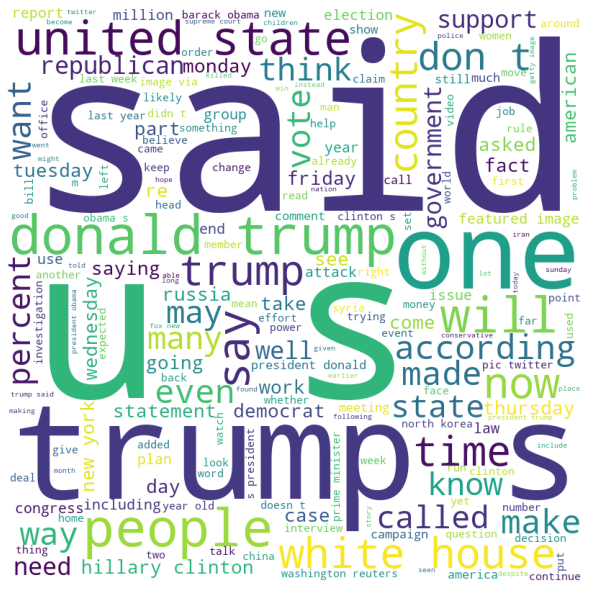

In [23]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Text Preprocessing


In [24]:
# Text lowercase
def lowercase_text(text): 
    return text.lower() 

# example
input_str = "Weather is too Cloudy.Possiblity of Rain is High,Today!!"
lowercase_text(input_str)

'weather is too cloudy.possiblity of rain is high,today!!'

In [25]:
df["text"] = df["text"].apply(lowercase_text)
df.head()

,title,text,Target
0,Trump Will ANNHILILATE The Working Class He’s...,"throughout his campaign, trump repeatedly told...",0
1,Yemen Houthis say have shot down U.S. surveill...,dubai (reuters) - yemen s houthi forces shot d...,1
2,BREAKING NEWS: TRUMP ADMIN ANNOUNCES “MASSIVE ...,president trump s 2017 tax reform for economi...,0
3,U.S. Commerce Secretary wants NAFTA autos cont...,mexico city (reuters) - u.s. commerce secretar...,1
4,U.S. warns of repercussions for Pakistan over ...,washington (reuters) - the white house said on...,1


In [26]:
# For Removing numbers 
def remove_num(text): 
    result = re.sub(r'\d+', '', text) 
    return result 

# example 
input_s = "You bought 6 candies from shop, and 4 candies are in home."
remove_num(input_s)

'You bought  candies from shop, and  candies are in home.'

In [27]:
df["text"] = df["text"].apply(remove_num)
df.head()

,title,text,Target
0,Trump Will ANNHILILATE The Working Class He’s...,"throughout his campaign, trump repeatedly told...",0
1,Yemen Houthis say have shot down U.S. surveill...,dubai (reuters) - yemen s houthi forces shot d...,1
2,BREAKING NEWS: TRUMP ADMIN ANNOUNCES “MASSIVE ...,president trump s tax reform for economic gr...,0
3,U.S. Commerce Secretary wants NAFTA autos cont...,mexico city (reuters) - u.s. commerce secretar...,1
4,U.S. warns of repercussions for Pakistan over ...,washington (reuters) - the white house said on...,1


In [28]:
# removing punctuation 
def rem_punct(text): 
    translator = str.maketrans('', '', string.punctuation) 
    return text.translate(translator) 

# example
input_str = "Hey, Are you excited??, After a week, we will be in Shimla!!!"
rem_punct(input_str)

'Hey Are you excited After a week we will be in Shimla'

In [29]:
df["text"] = df["text"].apply(rem_punct)
df.head()

,title,text,Target
0,Trump Will ANNHILILATE The Working Class He’s...,throughout his campaign trump repeatedly told ...,0
1,Yemen Houthis say have shot down U.S. surveill...,dubai reuters yemen s houthi forces shot down...,1
2,BREAKING NEWS: TRUMP ADMIN ANNOUNCES “MASSIVE ...,president trump s tax reform for economic gr...,0
3,U.S. Commerce Secretary wants NAFTA autos cont...,mexico city reuters us commerce secretary wil...,1
4,U.S. warns of repercussions for Pakistan over ...,washington reuters the white house said on sa...,1


## Removing Stopward

A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

Reference - https://stackoverflow.com/questions/5486337/how-to-remove-stop-words-using-nltk-or-python

In [30]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
nltk.download('stopwords')
nltk.download('punkt')

# removing stop word
stop = set(stopwords.words("english"))
def remove_stopwords(text):
  filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
  return " ".join(filtered_words)
len(stop) # there are 179 stop words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


179

In [31]:
df["text"] = df.text.map(remove_stopwords)
df.head()

,title,text,Target
0,Trump Will ANNHILILATE The Working Class He’s...,throughout campaign trump repeatedly told anyo...,0
1,Yemen Houthis say have shot down U.S. surveill...,dubai reuters yemen houthi forces shot us surv...,1
2,BREAKING NEWS: TRUMP ADMIN ANNOUNCES “MASSIVE ...,president trump tax reform economic growth ame...,0
3,U.S. Commerce Secretary wants NAFTA autos cont...,mexico city reuters us commerce secretary wilb...,1
4,U.S. warns of repercussions for Pakistan over ...,washington reuters white house said saturday w...,1


In [32]:
# removing HTML tags from the string
def remove_html_tags(text):
    pattern = re.compile('<.*?>') # used regular expression
    return pattern.sub(r'', text)
    
ex_text = "<p> Data is the new oil. A.I is the last invention </p> "
remove_html_tags(ex_text)

' Data is the new oil. A.I is the last invention  '

In [33]:
df['text'] = df['text'].apply(remove_html_tags)

In [34]:
# removing Uniform Resource Locator(URL) from string
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+') # used regular expression
    return pattern.sub(r'', text)

ex_text = "Data is the new oil. A.I is the last invention https://stackoverflow.com/questions/5486337/how-to-remove-stop-words-using-nltk-or-python "
remove_url(ex_text)

'Data is the new oil. A.I is the last invention  '

In [35]:
df['text'] = df['text'].apply(remove_url)
df.head()

,title,text,Target
0,Trump Will ANNHILILATE The Working Class He’s...,throughout campaign trump repeatedly told anyo...,0
1,Yemen Houthis say have shot down U.S. surveill...,dubai reuters yemen houthi forces shot us surv...,1
2,BREAKING NEWS: TRUMP ADMIN ANNOUNCES “MASSIVE ...,president trump tax reform economic growth ame...,0
3,U.S. Commerce Secretary wants NAFTA autos cont...,mexico city reuters us commerce secretary wilb...,1
4,U.S. warns of repercussions for Pakistan over ...,washington reuters white house said saturday w...,1


## Forming Vocabulary


In [36]:
# Count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count

counter = counter_word(df.text)

num_unique_words = len(counter)
print(num_unique_words)

229783


### Train and Validation Split


In [37]:
# Split dataset into training(90%) and validation set(10%)
train_size = int(df.shape[0] * 0.9)

train_df = df[:train_size]
val_df = df[train_size:]

# split text and labels
train_sentences = train_df.text.to_numpy()
train_labels = train_df.Target.to_numpy()
val_sentences = val_df.text.to_numpy()
val_labels = val_df.Target.to_numpy()

In [38]:
train_sentences.shape, val_sentences.shape

((40408,), (4490,))

## Tokenization

In [39]:
# vectorize a text corpus by turning each text into a sequence of integers i.e assigning each unqiue word(vocabulary) a unqiue number
tokenizer = Tokenizer(num_words=num_unique_words)
tokenizer.fit_on_texts(train_sentences) # fit only to training

# each word has unique index
word_index = tokenizer.word_index # dict- each word as key and value is unique indices 

In [40]:
type(tokenizer)

keras_preprocessing.text.Tokenizer

In [41]:
tokenizer

In [42]:
len(word_index)

218134

In [43]:
train_sentences[0]

'throughout campaign trump repeatedly told anyone could brainwash us win anything anymore supposedly used perennial powerhouse entire world like duke north carolina arizona perennial powerhouses ncaa basketball fallen status win anything like number games used toin words used able tell world would would trump promised working class would change bring jobs back make us prosperous jobs would never disappear everyone would begging trade us could tiny slice awesomenesswhether trump actually knows truth anyone guess focused winning told suffering working class particularly bluecollar workers whose jobs disappearing reason jobs gone given much countries deserve largesse whatever convinced half country percent tariff wants imported goods china percent tariff goods mexico keep companies outsourcing manufacturingand people bought ones hurt worst trump actual trade policiesthe economist pointed massive problem trump rhetoric single chart free trade agreements two countries countries represent th

In [44]:
train_sentences.shape

(40408,)

In [45]:
type(train_sentences)

numpy.ndarray

In [46]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
val_sequences = tokenizer.texts_to_sequences(val_sentences)

In [47]:
print(train_sentences[10])
print(train_sequences[10])

new york reuters us appeals court weighing arguments president donald trump’s temporary travel ban decision week may yet answer underlying legal questions raised fastmoving case th us circuit court appeals san francisco expected rule narrow question whether lower court’s emergency halt executive order trump justified trump signed order jan barring citizens seven muslimmajority countries days halted refugee entries four months appeals court several options could kick case back lower court judge james robart seattle saying premature make ruling chance consider evidence robart stopped trump’s order week issued arguments developed sides panel three appellate judges could side government find halting order harmful national security reinstating case continues decision “one step long historic case” stephen yaleloehr professor cornell university law school specializes immigration ultimately case likely end us supreme court legal experts said case first serious test executive authority since tr

In [48]:
import io
import json

In [49]:
tokenizer_json = tokenizer.to_json()
with io.open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [50]:
type(tokenizer_json)

str

In [52]:
max_length = 25
word_index["<PAD>"] = 0

## Padding & Truncating

In [53]:
train_padded = tf.keras.preprocessing.sequence.pad_sequences(sequences = train_sequences,value=word_index["<PAD>"],padding="post",maxlen=max_length,truncating='post')
val_padded = tf.keras.preprocessing.sequence.pad_sequences(sequences = val_sequences,value=word_index["<PAD>"],padding="post",maxlen=max_length,truncating='post')

In [54]:
train_padded.shape

(40408, 25)

In [55]:
val_padded.shape

(4490, 25)

# Creating Model

**Embedding:** https://www.tensorflow.org/tutorials/text/word_embeddings

Turns positive integers (indexes) into dense vectors of fixed size. (other approach could be one-hot-encoding). Word embeddings give us a way to use an efficient, dense representation in which similar words have a similar encoding. Importantly, you do not have to specify this encoding by hand. An embedding is a dense vector of floating point values (the length of the vector is a parameter you specify).

### **Making a Simple Recurrent Neural Network Model**

In [56]:
model = keras.models.Sequential()
model.add(layers.Embedding(num_unique_words, 16, input_length=max_length))
"""
The layer will take as input an integer matrix of size (batch, input_length),
and the largest integer (i.e. word index) in the input should be no larger than num_words (vocabulary size).
Now model.output_shape is (None, input_length, 16), where `None` is the batch dimension.
"""
model.add(layers.SimpleRNN(32, dropout=0.9))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 16)            3676528   
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1568      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 3,678,129
Trainable params: 3,678,129
Non-trainable params: 0
_________________________________________________________________


### Compiling the model

In [57]:
loss = keras.losses.BinaryCrossentropy(from_logits=False)
optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optim, metrics=metrics)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### Training

In [58]:
model.fit(train_padded, train_labels, epochs=5, validation_data=(val_padded, val_labels), verbose=2)

Epoch 1/5
1263/1263 - 48s - loss: 0.2823 - accuracy: 0.8857 - val_loss: 0.0423 - val_accuracy: 0.9933 - 48s/epoch - 38ms/step
Epoch 2/5
1263/1263 - 40s - loss: 0.1430 - accuracy: 0.9483 - val_loss: 0.0170 - val_accuracy: 0.9967 - 40s/epoch - 32ms/step
Epoch 3/5
1263/1263 - 41s - loss: 0.0951 - accuracy: 0.9653 - val_loss: 0.0105 - val_accuracy: 0.9978 - 41s/epoch - 33ms/step
Epoch 4/5
1263/1263 - 43s - loss: 0.0722 - accuracy: 0.9740 - val_loss: 0.0101 - val_accuracy: 0.9960 - 43s/epoch - 34ms/step
Epoch 5/5
1263/1263 - 40s - loss: 0.0565 - accuracy: 0.9795 - val_loss: 0.0187 - val_accuracy: 0.9938 - 40s/epoch - 32ms/step


In [59]:
model.save("model.h5")

# Predicting

In [60]:
predictions = model.predict(val_padded)
predictions = [1 if p > 0.5 else 0 for p in predictions]

In [61]:
# Check reversing the indices
# flip (key, value)
reverse_word_index = dict([(idx, word) for (word, idx) in word_index.items()])

In [62]:
def decode(sequence):
    return " ".join([reverse_word_index.get(idx, "?") for idx in sequence])

In [63]:
decoded_text = decode(train_sequences[10])
print(train_sequences[10])
print(decoded_text)

[10, 124, 11, 3, 1388, 55, 6044, 3197, 5, 12, 82, 1877, 695, 390, 180, 64, 42, 257, 978, 7055, 278, 533, 763, 27057, 135, 560, 3, 2156, 55, 1388, 844, 2091, 315, 508, 4588, 355, 131, 895, 3872, 1307, 2719, 256, 142, 2, 5858, 2, 737, 142, 1185, 5255, 471, 864, 3418, 162, 186, 5394, 908, 17548, 276, 202, 1388, 55, 182, 1966, 19, 5463, 135, 58, 895, 55, 361, 629, 8350, 3750, 89, 9825, 49, 502, 1032, 910, 348, 8350, 1510, 82, 142, 64, 742, 3197, 3086, 1053, 1073, 132, 10874, 1725, 19, 641, 14, 403, 8217, 142, 6333, 43, 40, 14374, 135, 1129, 180, 5111, 710, 184, 2029, 12053, 2015, 29224, 1297, 9416, 360, 51, 282, 11953, 209, 1697, 135, 196, 156, 3, 350, 55, 278, 888, 1, 135, 31, 686, 1079, 256, 1015, 50, 2, 736, 5, 1185, 278, 888, 1, 132, 706, 323, 999, 1561, 2214, 533, 135, 131, 16, 86, 1166, 80, 209, 604, 99, 158, 55, 355, 2052, 43, 40, 1432, 142, 12522, 479, 35, 9, 955, 2010, 1152, 1446, 1358, 390, 469, 6083, 4450, 3775, 1116, 869, 8816, 1788, 2, 61, 754, 503, 28087, 1420, 1388, 55, 681,

In [64]:
print(train_sentences[10:20])
print(train_labels[10:20])
print(predictions[10:20])

['new york reuters us appeals court weighing arguments president donald trump’s temporary travel ban decision week may yet answer underlying legal questions raised fastmoving case th us circuit court appeals san francisco expected rule narrow question whether lower court’s emergency halt executive order trump justified trump signed order jan barring citizens seven muslimmajority countries days halted refugee entries four months appeals court several options could kick case back lower court judge james robart seattle saying premature make ruling chance consider evidence robart stopped trump’s order week issued arguments developed sides panel three appellate judges could side government find halting order harmful national security reinstating case continues decision “one step long historic case” stephen yaleloehr professor cornell university law school specializes immigration ultimately case likely end us supreme court legal experts said case first serious test executive authority since 

#  Model Evaluation

In [66]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [84]:
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(predictions, val_labels))

				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2304
           1       1.00      0.99      0.99      2186

    accuracy                           0.99      4490
   macro avg       0.99      0.99      0.99      4490
weighted avg       0.99      0.99      0.99      4490



In [87]:
cm=metrics.confusion_matrix(val_labels,predictions)
print(cm)

[[2302   26]
 [   2 2160]]
